Import Required library for data analysis and Visualisation

Load Accident dataset for Casualty severity Prediction with Random Forest and Neural Net(MLP) from CSV file.

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import datasist as ds
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and read dataset and set it to show all columns
pd.set_option('display.max_columns', None)
df_accidents = pd.read_csv('Accidents0515.csv',index_col='Accident_Index')
df_casualties=pd.read_csv('Casualties0515.csv' , error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [3]:
# Merge accident dataset and casualities data set on the accident index column
df = df_accidents.merge(df_casualties, on='Accident_Index', how='inner')

In [4]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [5]:
# Covert 'Date' to proper datetime format to isolate specific year (2010)
df['Date'] = df['Date'].astype('datetime64')
df = df[(df['Date'] > "2009-12-31") & (df['Date'] < "2011-01-01")]

In [6]:
# checking maximum and minimum date contained in the dataset
print('Minimum Date: %s' % df['Date'].min())
print('Maximum Date: %s' % df['Date'].max())

Minimum Date: 2010-01-01 00:00:00
Maximum Date: 2010-12-31 00:00:00


In [7]:
# Dropping the accident index
df.reset_index(inplace = True, drop = True)

In [8]:
# Statistical information of Numerical and categorical Features of dataset
ds.structdata.describe(df)

First five data points


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,527580.0,177730.0,-0.164002,51.484087,1,3,2,1,2010-11-01,2,07:30,12,E09000020,4,302,6,30,3,4,6,0,0,0,1,8,2,0,0,1,1,E01002900,2,1,1,1,26,6,3,0,0,0,0,-1,1,1
1,525340.0,180470.0,-0.195273,51.509212,1,3,1,1,2010-11-01,2,18:35,12,E09000020,3,402,6,30,3,2,3,4204,0,5,4,2,2,0,0,1,1,E01002884,1,1,3,1,49,8,3,4,3,0,0,-1,0,1
2,524800.0,180300.0,-0.203110,51.507804,1,3,2,1,2010-12-01,3,10:22,12,E09000020,3,402,6,30,3,2,4,450,0,5,1,1,1,0,0,1,1,E01002871,2,1,1,1,33,6,3,0,0,0,0,-1,1,1
3,525080.0,180920.0,-0.198858,51.513314,1,3,2,1,2010-02-01,7,21:21,12,E09000020,6,0,1,30,2,4,6,0,0,0,4,1,1,0,0,1,1,E01002886,1,1,2,1,-1,-1,3,0,0,1,0,-1,9,1
4,526760.0,177740.0,-0.175802,51.484361,1,3,2,1,2010-04-01,2,20:35,12,E09000020,3,3217,6,30,6,2,3,3220,0,0,4,1,2,0,0,1,1,E01002845,2,1,2,1,28,6,3,0,0,0,0,-1,5,1




Random five data points


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
145822,469380.0,105410.0,-1.015941,50.843998,44,3,2,1,2010-02-24,4,17:25,495,E10000014,2,3,3,70,5,4,3,27,0,0,4,2,2,0,0,2,1,E01022912,2,1,1,2,45,7,3,0,0,0,0,-1,9,1
149309,463450.0,151770.0,-1.092042,51.261510,44,3,1,1,2010-09-13,2,13:25,490,E10000014,6,0,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,2,E01022503,1,1,3,2,31,6,3,6,9,0,0,-1,0,1
19332,525130.0,165680.0,-0.203522,51.376337,1,2,2,1,2010-07-05,6,07:40,21,E09000029,3,217,3,40,3,4,6,0,0,0,1,1,1,0,0,1,1,E01004130,2,1,1,1,13,3,2,0,0,0,0,-1,1,1
19829,543680.0,177950.0,0.067805,51.482206,1,2,2,2,2010-10-13,4,19:50,6,E09000011,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01001703,1,2,2,1,-1,-1,3,0,0,1,0,-1,9,-1
85179,394200.0,284250.0,-2.086794,52.456140,20,3,2,2,2010-12-23,5,19:30,303,E08000027,6,0,6,30,3,4,6,0,0,0,4,8,3,0,0,1,2,E01009813,2,1,1,1,52,8,3,0,0,0,0,-1,9,1




Last five data points


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
208643,319480.0,566660.0,-3.259920,54.988020,98,3,1,1,2010-12-28,3,15:20,917,S12000006,6,906,6,30,3,4,6,907,0,4,1,1,2,0,0,2,2,NaN,1,1,3,1,25,5,3,4,1,0,0,-1,0,3
208644,310200.0,581000.0,-3.409423,55.115256,98,3,2,2,2010-12-30,5,17:46,917,S12000006,3,709,6,60,3,4,5,26,0,0,6,7,2,0,0,2,1,NaN,1,2,2,1,54,8,3,0,0,1,0,-1,9,2
208645,310200.0,581000.0,-3.409423,55.115256,98,3,2,2,2010-12-30,5,17:46,917,S12000006,3,709,6,60,3,4,5,26,0,0,6,7,2,0,0,2,1,NaN,2,1,1,2,29,6,3,0,0,0,0,-1,9,2
208646,308350.0,600840.0,-3.444858,55.293144,98,2,2,2,2010-12-29,4,11:49,917,S12000006,4,7076,6,60,3,4,3,701,0,0,1,1,3,0,0,2,1,NaN,1,1,1,1,84,11,2,0,0,0,0,-1,9,2
208647,308350.0,600840.0,-3.444858,55.293144,98,2,2,2,2010-12-29,4,11:49,917,S12000006,4,7076,6,60,3,4,3,701,0,0,1,1,3,0,0,2,1,NaN,2,2,1,2,22,5,3,0,0,0,0,-1,9,3




Shape of  data set: (208648, 45)


Size of  data set: 9389160


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,int64
Number_of_Casualties,int64
Date,datetime64[ns]
Day_of_Week,int64




Column(s) {'Date'} should be in Datetime format. Use the [to_date] function in datasist.feature_engineering to convert to Pandas Datetime format


Numerical Features in Data set
['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Reference', 'Casualty_Reference', 'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passeng

['Time', 'Local_Authority_(Highway)', 'LSOA_of_Accident_Location']



Statistical Description of Columns


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
count,208648.000000,2.086480e+05,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.00000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.000000,208648.0,208648.000000,208648.000000
mean,437583.711898,3.019750e+05,-1.465444,52.605859,30.617586,2.827796,1.922846,1.852584,4.118683,353.064391,4.009101,1023.370270,5.144492,40.036018,2.329301,1.803971,2.614964,388.910462,0.011220,0.736834,1.929992,1.602666,1.451411,0.116498,0.074508,1.386737,1.17033,1.484721,1.427639,1.495059,1.421931,34.594307,6.053262,2.873663,0.662221,0.475221,0.284944,0.095951,-1.0,7.561659,1.054144
std,95183.499382,1.602234e+05,1.398763,1.442845,25.243700,0.416847,0.801442,1.852818,1.955625,256.672690,1.433447,1831.209108,1.632917,14.581894,2.567027,2.279484,3.208276,1323.824529,0.141723,1.821285,1.637867,1.690267,0.775330,0.739541,0.632110,0.487004,0.37911,0.618620,1.163383,0.705490,0.495061,18.834584,2.390406,0.357924,1.951092,1.668266,0.594403,0.583814,0.0,7.409478,0.981053
min,64950.000000,1.065000e+04,-7.516225,49.915730,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.0,0.000000,-1.000000
25%,372980.000000,1.790300e+05,-2.408077,51.497547,7.000000,3.000000,1.000000,1.000000,2.000000,129.000000,3.000000,1.000000,6.000000,30.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,20.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-1.0,4.000000,1.000000
50%,438240.000000,2.785700e+05,-1.428854,52.397638,30.000000,3.000000,2.000000,1.000000,4.000000,324.000000,3.000000,141.000000,6.000000,30.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,31.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-1.0,9.000000,1.000000
75%,520480.000000,3.984200e+05,-0.252007,53.481063,46.000000,3.000000,2.000000,2.000000,6.000000,530.000000,6.000000,737.000000,6.000000,60.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.00000,2.000000,2.000000,2.000000,2.000000,47.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-1.0,9.000000,1.000000
max,655370.000000,1.174800e+06,1.759398,60.454772,98.000000,3.000000,19.000000,43.000000,7.000000,941.000000,6.000000,9999.000000,9.000000,70.000000,9.000000,4.000000,6.000000,9999.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,3.00000,17.000000,43.000000,3.00000



Description of Categorical Features


,count,unique,top,freq
Time,208639,1439,17:00,1898
Local_Authority_(Highway),208648,207,E10000016,5802
LSOA_of_Accident_Location,195298,29331,E01000004,339




Unique class Count of Categorical features


,Feature,Unique Count
0,Time,1440
1,Local_Authority_(Highway),207
2,LSOA_of_Accident_Location,29332




Missing Values in Data


,features,missing_counts,missing_percent
0,Location_Easting_OSGR,0,0.0
1,Location_Northing_OSGR,0,0.0
2,Longitude,0,0.0
3,Latitude,0,0.0
4,Police_Force,0,0.0
5,Accident_Severity,0,0.0
6,Number_of_Vehicles,0,0.0
7,Number_of_Casualties,0,0.0
8,Date,0,0.0
9,Day_of_Week,0,0.0


In [9]:
# Seperating the date into day month and year for proper analysis
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df_eda =df.copy()
df = df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 
              'Pedestrian_Road_Maintenance_Worker', 'Junction_Control',
               'Police_Force', 'LSOA_of_Accident_Location',
               'Did_Police_Officer_Attend_Scene_of_Accident', 'Year', 'Date', 'Local_Authority_(Highway)',
               '1st_Road_Number', '2nd_Road_Number', '1st_Road_Number', '2nd_Road_Class', 'Longitude',
             'Latitude'], axis=1)

# slice first and second string from time column
df['Hour'] = df['Time'].str[0:2]
print(df['Hour'])
# convert new column to numeric datetype
df['Hour'] = pd.to_numeric(df['Hour'])

0         07
1         18
2         10
3         21
4         20
          ..
208643    15
208644    17
208645    17
208646    11
208647    11
Name: Hour, Length: 208648, dtype: object


In [10]:
df.dropna(how='any',inplace=True)

In [11]:
#Sum of Duplicates
df.duplicated().sum()

2

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
# cast to integer values
df["Time"] = df["Time"].astype("datetime64[ns]")
df['Hour'] = df['Hour'].astype('int')
df.drop("Time", axis=1, inplace=True)

In [15]:
# check negative values

In [16]:
df.lt(0).sum()

Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
1st_Road_Class                                 0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                            83
Road_Surface_Conditions                      203
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Vehicle_Reference                              0
Casualty_Reference                             0
Casualty_Class                                 0
Sex_of_Casualty     

In [17]:
# Drop Negative Values

In [18]:
df = df.drop(df.index[df['Sex_of_Casualty'] < 0])

In [19]:
df = df.drop(df.index[df['Age_Band_of_Casualty'] < 0])

In [20]:
df = df.drop(df.index[df['Bus_or_Coach_Passenger'] < 0])

In [21]:
df = df.drop(df.index[df['Weather_Conditions'] < 0])

In [22]:
df = df.drop(df.index[df['Road_Surface_Conditions'] < 0])

In [23]:
# Check remaining negative values after dropping 

In [24]:
df.shape

(204448, 33)

# Exploratory Data Analysis

In [25]:
df_eda.head(2)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Day,Month,Year
0,527580.0,177730.0,-0.164002,51.484087,1,3,2,1,2010-11-01,2,07:30,12,E09000020,4,302,6,30,3,4,6,0,0,0,1,8,2,0,0,1,1,E01002900,2,1,1,1,26,6,3,0,0,0,0,-1,1,1,1,11,2010
1,525340.0,180470.0,-0.195273,51.509212,1,3,1,1,2010-11-01,2,18:35,12,E09000020,3,402,6,30,3,2,3,4204,0,5,4,2,2,0,0,1,1,E01002884,1,1,3,1,49,8,3,4,3,0,0,-1,0,1,1,11,2010


In [26]:
# Replace numeric weeekday representation with weekday name
df_eda['Day_of_Week'] = df_eda['Day_of_Week'].replace({1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 
                                                       5:'Thursday', 6:'Friday', 7:'Saturday'})

#### Analysis of total number of casualities recorded per month in the year

12    15262
11    18014
10    18584
9     18151
8     18414
7     17629
6     17496
5     18498
4     17178
3     16980
2     15460
1     16982
Name: Date, dtype: int64


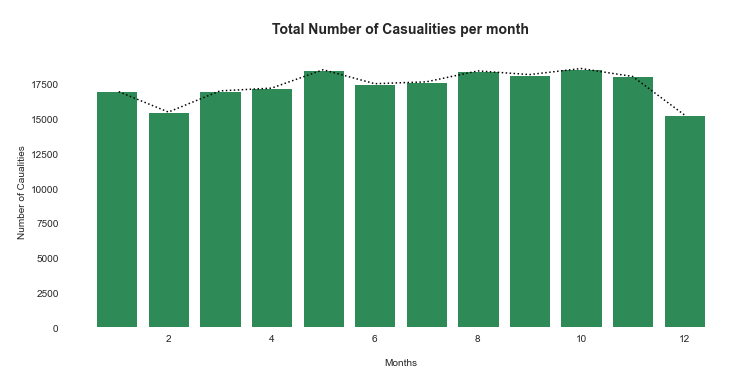

In [27]:
# Plotting Number of Casualities over the month(2010)

# Getting monthly count
monthly_count = df_eda['Date'].dt.month.value_counts().sort_index(ascending=False)
print(monthly_count)


# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

# plot
ax.bar(monthly_count.index, monthly_count.values, color='seagreen')
ax.plot(monthly_count, linestyle=':', color='black')
ax.set_title('\nTotal Number of Casualities per month\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nNumber of Caualities')
ax.set(xlabel='\nMonths')
# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

#### Plot show thetotal number of casualities recorded per month, with october the tenth month having the highest number 

In [28]:
df_eda['Day_of_Week'].value_counts()

Friday       34453
Wednesday    30245
Tuesday      30232
Thursday     30166
Monday       29855
Saturday     29454
Sunday       24243
Name: Day_of_Week, dtype: int64

#### Analysis of average number of casualities per day

In [29]:
# Using timeseries data ('Date') to count the number of casualties on each day of the year
count_weekday = pd.DataFrame(df_eda.set_index('Date').resample('1d').size().reset_index())
# print(weekday_counts)

#weekday_counts - renaming columns
count_weekday.columns = ['Date', 'Count']
# print(count_weekday.columns)

#weekday - using timeseries data to get name of day
weekday = count_weekday['Date'].dt.day_name()


# Calculating average per day for the year
avg_weekday = pd.DataFrame(count_weekday.groupby(weekday)['Count'].mean().reset_index())
avg_weekday.columns = ['Weekday', 'Average_Casualities']
avg_weekday.set_index('Weekday', inplace=True)
avg_weekday

,Average_Casualities
Weekday,
Friday,592.339623
Monday,556.461538
Saturday,600.326923
Sunday,509.076923
Thursday,582.346154
Tuesday,583.980769
Wednesday,576.538462


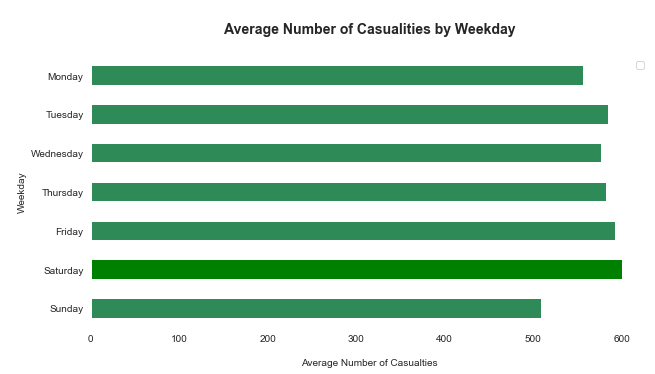

In [30]:
# Plotting the dataframe
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
colors=['seagreen', 'green', 'seagreen',  'seagreen', 
        'seagreen', 'seagreen', 'seagreen']

# plot
avg_weekday.reindex(days).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAverage Number of Casualities by Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nAverage Number of Casualties')
ax.set(ylabel='\nWeekday')
ax.legend('')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

#### Plot show the count of average number of casualities recorded per week, with saturday having the highest average

#### Analysis of number of casualities per day and month in the year

In [31]:
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
month    = df_eda['Date'].dt.month
weekday = df_eda['Date'].dt.day_name()


# Group data by month and day
grp_cas = df_eda.groupby([month, weekday]).size()


grp_cas = grp_cas.rename_axis(['month', 'Weekday']).unstack('Weekday').reindex(columns=days)
grp_cas

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
month,,,,,,,
1,2966,3036,2584,2059,2191,1843,2303
2,2028,2217,1962,2272,2674,2289,2018
3,1931,2285,2206,2438,2664,2960,2496
4,2032,2508,3169,2860,2172,2402,2035
5,2854,3109,2712,2412,2082,2448,2881
6,1971,2255,2464,2406,3053,2956,2391
7,1903,2883,2904,2807,2547,2287,2298
8,2524,2455,2637,2429,2486,3106,2777
9,2038,2611,2359,3276,2926,2514,2427


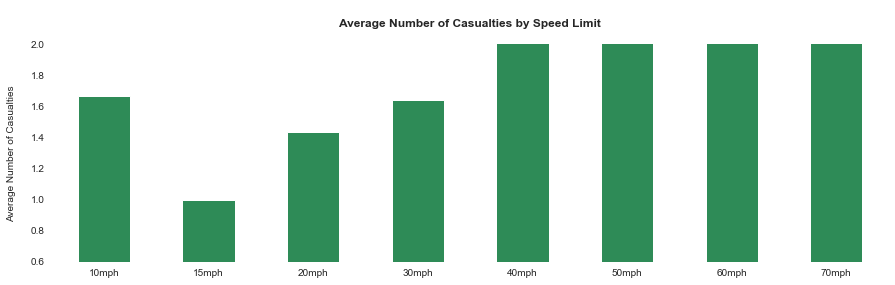

In [32]:
# Speed limit as it pertains to casualty
df_eda.groupby('Speed_limit')['Number_of_Casualties'].mean().plot(kind='bar', color='seagreen', 
                                                              figsize=(15,4), grid=False)

plt.xticks(np.arange(8), 
           ['10mph', '15mph', '20mph', '30mph', '40mph', '50mph', '60mph', '70mph'], 
           rotation='horizontal')
plt.ylim((0.6,2.0))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Speed Limit\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

### Plot show the count of average number of casualities recorded by speed limit, showing that the average casualities are recorded at 60mph

In [33]:
df_eda['Sex_of_Casualty'].value_counts()

 1    120490
 2     88117
-1        41
Name: Sex_of_Casualty, dtype: int64

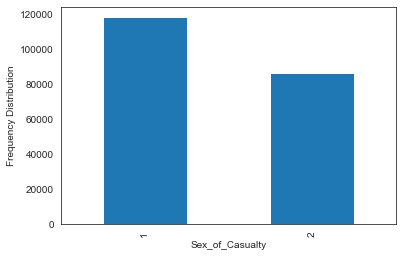

In [34]:
df['Sex_of_Casualty'].value_counts().plot(kind='bar')
plt.xlabel('Sex_of_Casualty')
plt.ylabel('Frequency Distribution')
plt.show()

#### Proportion of casualty severity by week

In [35]:
# Create a dataframe for casuality severity by date
df_1 = df_eda[['Date','Casualty_Severity']]
# seperate date into month and week
month = df_1['Date'].dt.month
week = df_1['Date'].dt.week
# count of caualities by week
casualities_count = df_1.set_index('Date').groupby([pd.Grouper(freq='W'), 'Casualty_Severity']).size()
casualities = casualities_count.rename_axis(['Week', 'Casualty_Severity']).unstack('Casualty_Severity').rename({1:'fatal', 2:'serious', 3:'slight'}, 
                                                                                                               axis='columns')

In [36]:
casualities.head()

Casualty_Severity,fatal,serious,slight
Week,,,
2010-01-03,12,198,1805
2010-01-10,29,476,4083
2010-01-17,23,291,2773
2010-01-24,31,366,3005
2010-01-31,39,448,3403


In [37]:
df_eda.groupby('Month')['Casualty_Severity'].mean()

Month
1     2.879461
2     2.881177
3     2.874441
4     2.873792
5     2.861553
6     2.867741
7     2.871916
8     2.872597
9     2.869869
10    2.872417
11    2.878428
12    2.883764
Name: Casualty_Severity, dtype: float64

Text(0.5, 1.0, '\nAverage casualty severity by Month\n')

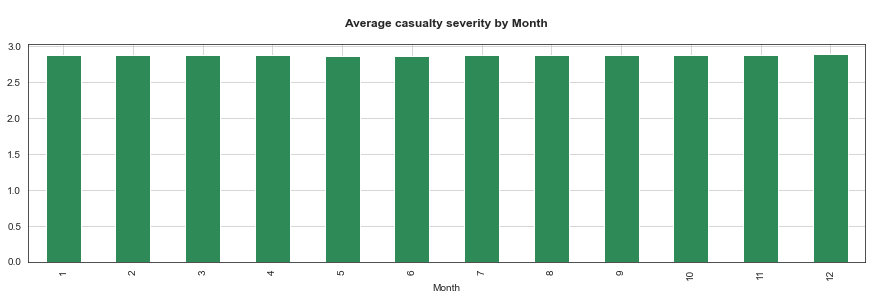

In [38]:
# Speed limit as it pertains to casualty
df_eda.groupby('Month')['Casualty_Severity'].mean().plot(kind='bar', color='seagreen', 
                                                              figsize=(15,4), grid=True)
plt.title('\nAverage casualty severity by Month\n', fontweight='bold')

#### Plot show the count of average severity of casualities recorded per month, with December having the highest average

Text(0.5, 1.0, '\ncount of casualty severity by Weekday\n')

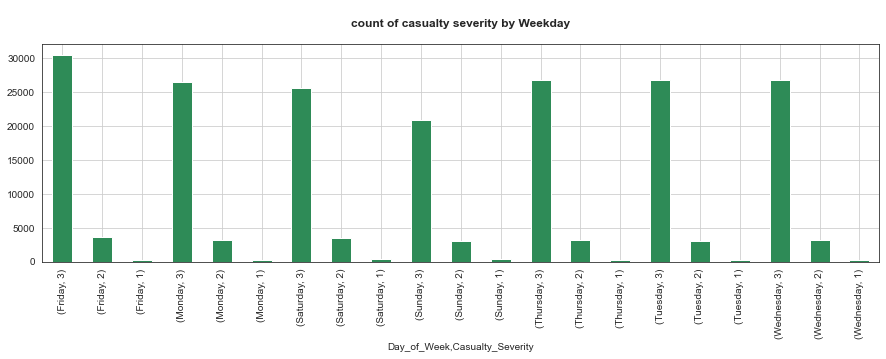

In [39]:
df_eda.groupby('Day_of_Week')['Casualty_Severity'].value_counts().plot(kind='bar', color='seagreen', 
                                                              figsize=(15,4), grid=True)
plt.title('\ncount of casualty severity by Weekday\n', fontweight='bold')

#### Plot show the count of severity of casualities recorded per day, with Friday having the highest severity of "slight" and least been Thursday  with severity of "fatal"

In [40]:
df['Casualty_Severity'].value_counts()

3    180279
2     22321
1      1848
Name: Casualty_Severity, dtype: int64

In [41]:
df['Casualty_Severity'] = df['Casualty_Severity'].replace({1:'Fatal', 2:'Serious', 3:'Slight'})

In [42]:
df['Casualty_Severity'].value_counts()

Slight     180279
Serious     22321
Fatal        1848
Name: Casualty_Severity, dtype: int64

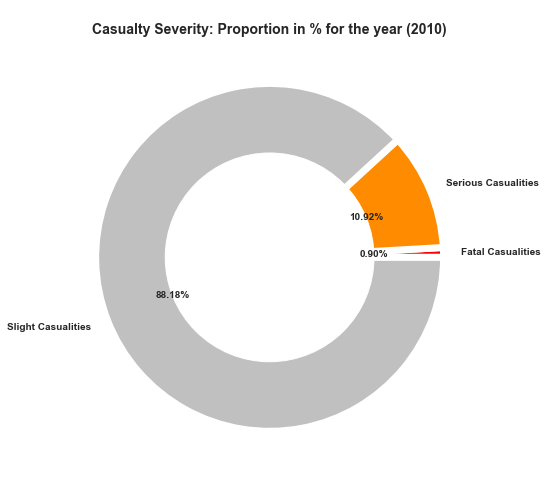

In [43]:
# assign the data
fatal   = df.Casualty_Severity.value_counts()['Fatal']
serious = df.Casualty_Severity.value_counts()['Serious']
slight  = df.Casualty_Severity.value_counts()['Slight']

names = ['Fatal Casualities','Serious Casualities', 'Slight Casualities']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nCasualty Severity: Proportion in % for the year (2010)', fontsize=14, fontweight='bold')
plt.show();

#### Plot show the percentage severity of casualities recorded for the year, with slight casualities as the highest

<AxesSubplot:>

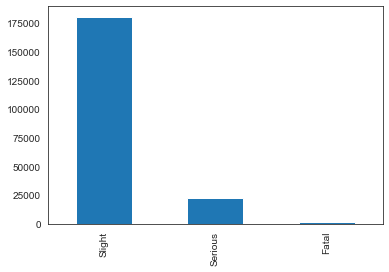

In [44]:
df['Casualty_Severity'].value_counts().plot(kind='bar')

In [45]:
# Created a new target variable - Target class was reduced from a multi-class to a binary classification.
df.loc[df.Casualty_Severity !='Slight', 'Target_severity'] = 1
df.loc[df.Casualty_Severity =='Slight', 'Target_severity'] = 0
df.drop('Casualty_Severity', axis=1, inplace=True)

In [46]:
df['Target_severity'].value_counts()

0.0    180279
1.0     24169
Name: Target_severity, dtype: int64

In [47]:
df = df.drop(['Casualty_Home_Area_Type'], axis=1)

<b>A correlation coefficient (typically denoted r) is a single number that describes the extent of the linear relationship between two variables. A value of +1 indicates perfect linearity (the two variables move together, like “height in inches” and “height in centimeters”). A value of r = 0 indicates no correlation (the variables are independent) and r = -1 indicates the variables are inversely correlated (an increase in one variable is associated with a decrease in the other).</b>

Text(0.5, 1.0, 'Correlation between features')

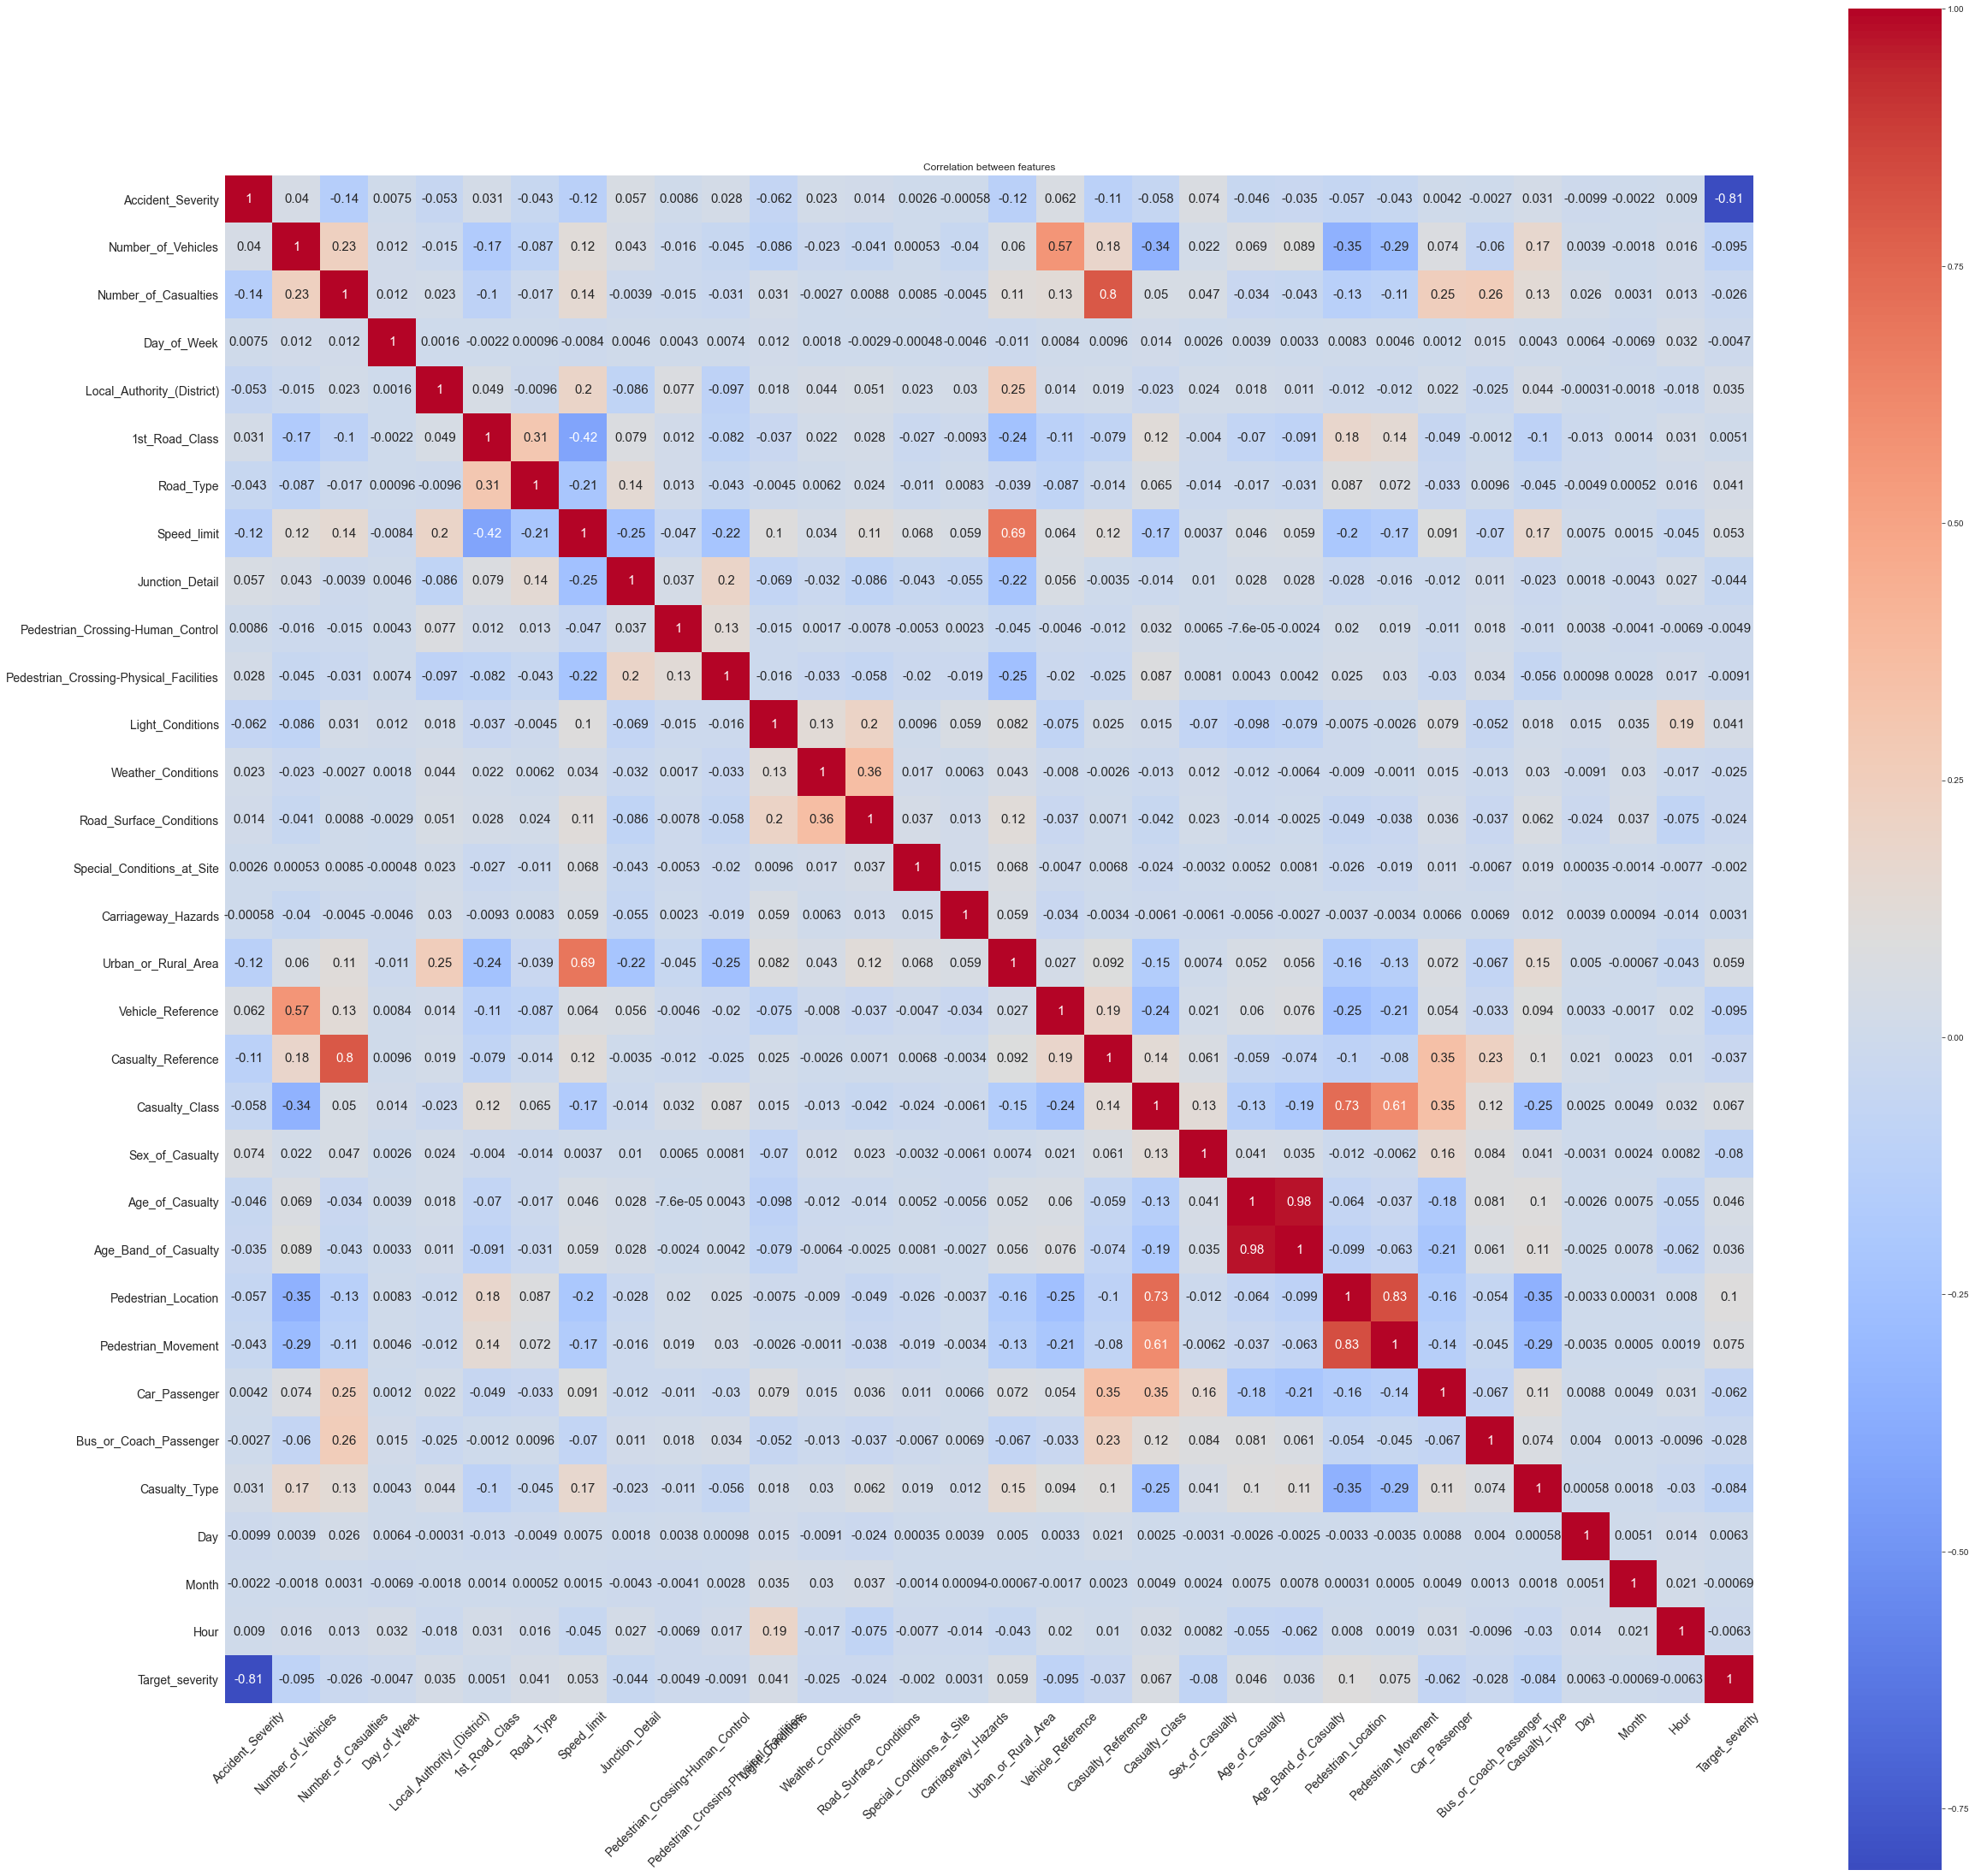

In [48]:
# Correlation between features
corr = df.corr()
plt.figure(figsize=(40, 40))
sn=sns.heatmap(corr, cbar = True,  square = True, annot=True,annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.yticks(rotation=0,fontsize=14) 
plt.xticks(rotation=45,fontsize=14) 
plt.title('Correlation between features')

In [49]:
X_f = df.drop('Target_severity', axis=1)
y_f = df['Target_severity']

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_f,y_f)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_f.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                         Specs         Score
4   Local_Authority_(District)  46864.512440
23         Pedestrian_Location  12279.172991
27               Casualty_Type  10450.933303
0            Accident_Severity   8298.155069
24         Pedestrian_Movement   6702.822186
21             Age_of_Casualty   4185.191999
7                  Speed_limit   3053.858938
8              Junction_Detail   1106.545970
25               Car_Passenger    992.531595
1           Number_of_Vehicles    624.470701


In [51]:
X = df[['Local_Authority_(District)', 'Pedestrian_Location', 'Casualty_Type', 'Pedestrian_Movement', 'Age_of_Casualty',
     'Speed_limit', 'Junction_Detail', 'Car_Passenger', 'Number_of_Vehicles', 'Bus_or_Coach_Passenger']]
y = df['Target_severity']

- ### Examining Distribution of Target Class: Serious or Fatal

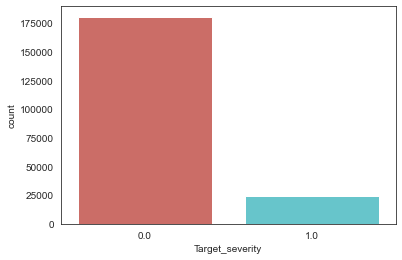

In [52]:
sns.countplot(x='Target_severity',data=df, palette='hls')
plt.show()

# Training Modelling

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.30)

In [54]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Basic accuracy, defined as the ratio of right predictions to the total number of samples in the dataset, is a relatively simple metric for measuring classification. However, in the situation of unequal classes, this metric might be deceptive because high scores do not indicate predictive capacity for the minority class. One may have a 99 percent accuracy rate but a low prediction capacity in the class in which they are actually interested (eg. anomaly detection where anomalies are rare classes in a dataset).
As a result, we begin by computing alternative performance metrics such as <b>AUC, recall, and F1 scores.</b>

The <b> AUC - ROC curve </b> is a performance metric for classification problems with varying threshold values. AUC is the degree or measure of separability, whereas ROC is a probability curve. It indicates how well the model can differentiate between classes. The higher the AUC, the better the model predicts 0s as 0s and 1s as 1s.

The percentage of total relevant results accurately categorized by the algorithm is referred to as <b>recall.</b>

The <b>F1 score</b> may be viewed as a weighted average of accuracy and recall, with a best value of 1 and a worst value of 0.

In [72]:
y_pred = lr.predict(X_test)

In [73]:
from sklearn.metrics import roc_auc_score

In [74]:
roc_auc_score(y_test, y_pred)

0.5001375515818431